In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:.4f}".format
sns.set()
%matplotlib inline

# Nothing new here, but EDA is crucial for any downstream modeling efforts

### Blockchain Data

In [23]:
bd = pd.read_csv('Tech_Eval/blockchain_data.csv') # bd = 'blockchain data
bd.head(10)

,asset_id,epoch_ts,volume_sum,volume_high,volume_low,volume_mean_q,volume_mean_a,volume_mean_g,volume_mean_h,volume_std,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
0,Bitcoin_BTC_BTC,2019-02-19 00:00:00+00,1780234.1047,11837.0055,0.0000,74.2820,5.1121,0.0544,0.0014,74.1060,...,0.0552,0.0000,0.0004,0.0001,0.0000,0.0000,0.0004,1950.0000,17547737.5000,193912854133
1,Dash_DASH_DASH,2019-02-19 00:00:00+00,338898.8522,12879.6411,0.0000,324.5759,23.6546,0.1737,0.0033,323.7241,...,0.0378,0.0000,0.0019,0.0002,0.0000,0.0000,0.0019,1850.1158,8310922.1439,8295434127
2,Ethereum_ETH_ETH,2019-02-19 00:00:00+00,2787834.9212,28467.0000,0.0000,137.3594,5.1805,0.2233,0.0000,137.2618,...,0.1602,0.0000,0.0122,0.0044,0.0017,0.0011,0.0114,13536.0312,33279307.2188,73831306948
3,Litecoin_LTC_LTC,2019-02-19 00:00:00+00,4954276.1673,81336.2803,0.0000,2483.3212,187.2435,2.3326,0.0215,2476.2988,...,0.1000,0.0000,0.0035,0.0007,0.0002,0.0000,0.0034,15125.0000,60568775.0000,18246202449
4,Zcash_ZEC_ZEC,2019-02-19 00:00:00+00,2372777.4334,78641.2170,0.0000,5599.4904,611.5406,4.9549,0.0286,5566.7133,...,0.0712,0.0000,0.0023,0.0003,0.0001,0.0000,0.0023,7250.0000,5931475.0000,18321777658
5,Bitcoin_BTC_BTC,2019-02-18 00:00:00+00,1187294.4441,4346.6707,0.0000,34.6163,3.4487,0.0499,0.0015,34.4442,...,0.1120,0.0000,0.0006,0.0001,0.0000,0.0000,0.0006,1937.5000,17545787.5000,193786067976
6,Dash_DASH_DASH,2019-02-18 00:00:00+00,289183.3405,13070.3320,0.0000,260.3130,21.5246,0.1878,0.0026,259.4312,...,0.0674,0.0000,0.0019,0.0002,0.0000,0.0000,0.0019,1820.0054,8309072.0281,8281540377
7,Ethereum_ETH_ETH,2019-02-18 00:00:00+00,3021451.7103,70844.1487,0.0000,194.3165,5.8451,0.2397,0.0000,194.2287,...,0.1600,0.0000,0.0130,0.0048,0.0017,0.0010,0.0121,13307.8438,33265771.1875,73725904942
8,Litecoin_LTC_LTC,2019-02-18 00:00:00+00,4330423.0116,175200.8793,0.0000,2281.3024,162.0425,2.4561,0.0259,2275.5827,...,0.1685,0.0000,0.0038,0.0007,0.0002,0.0000,0.0037,15100.0000,60553650.0000,18231051077
9,Zcash_ZEC_ZEC,2019-02-18 00:00:00+00,1351855.4439,72248.2042,0.0000,3387.0041,351.6794,6.5477,0.0205,3369.1351,...,0.0402,0.0000,0.0019,0.0003,0.0001,0.0000,0.0019,7187.5000,5924225.0000,18314844261


In [5]:
bd.columns # Descriptions in the accompanying .docx

Index(['asset_id', 'epoch_ts', 'volume_sum', 'volume_high', 'volume_low',
       'volume_mean_q', 'volume_mean_a', 'volume_mean_g', 'volume_mean_h',
       'volume_std', 'coinbase_volume', 'txn_count', 'fee_sum', 'fee_high',
       'fee_low', 'fee_mean_q', 'fee_mean_a', 'fee_mean_g', 'fee_mean_h',
       'fee_std', 'block_reward_sum', 'supply_total', 'blockchain_size'],
      dtype='object')

In [15]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 23 columns):
asset_id            2075 non-null object
epoch_ts            2075 non-null object
volume_sum          2075 non-null float64
volume_high         2075 non-null float64
volume_low          2075 non-null float64
volume_mean_q       2075 non-null float64
volume_mean_a       2075 non-null float64
volume_mean_g       2075 non-null float64
volume_mean_h       2075 non-null float64
volume_std          2075 non-null float64
coinbase_volume     2075 non-null float64
txn_count           2075 non-null int64
fee_sum             2075 non-null float64
fee_high            2075 non-null float64
fee_low             2075 non-null float64
fee_mean_q          2075 non-null float64
fee_mean_a          2075 non-null float64
fee_mean_g          2075 non-null float64
fee_mean_h          2075 non-null float64
fee_std             2075 non-null float64
block_reward_sum    2075 non-null float64
supply_total   

In [43]:
bd.describe()

,volume_sum,volume_high,volume_low,volume_mean_q,volume_mean_a,volume_mean_g,volume_mean_h,volume_std,coinbase_volume,txn_count,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
count,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,...,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000,2075.0000
mean,1911549.7280,52601.9221,0.0001,816.1837,69.9568,1.2717,0.0229,812.7557,9154.2770,193348.0164,...,0.1382,0.0000,0.0046,0.0012,0.0004,0.0003,0.0044,9092.4886,23277954.3049,51493060235.7716
std,2859994.0386,107009.5452,0.0002,1290.6365,112.2639,1.8925,0.0412,1286.1395,7207.3709,274502.4416,...,0.1946,0.0000,0.0039,0.0014,0.0006,0.0004,0.0037,7238.6337,19240849.3498,62934774008.0165
min,56198.7114,1017.0406,0.0000,4.4324,0.0404,0.0001,0.0000,4.4322,1303.2781,2339.0000,...,0.0230,0.0000,0.0001,0.0000,0.0000,0.0000,0.0001,1262.5000,2965037.5000,4037612930.0000
25%,545360.3113,8853.6861,0.0000,88.2069,4.6799,0.1059,0.0011,87.6019,1891.1150,9075.0000,...,0.0668,0.0000,0.0018,0.0003,0.0000,0.0000,0.0018,1860.1526,7741247.0665,11254839326.0000
50%,1189194.9308,23988.0883,0.0000,211.9814,15.4538,0.2762,0.0040,211.3280,7179.3192,26972.0000,...,0.1000,0.0000,0.0034,0.0007,0.0001,0.0000,0.0033,7175.0000,17175162.5000,17167795612.0000
75%,2357182.9418,54238.4208,0.0000,1230.8619,109.2510,2.0740,0.0162,1223.7540,14988.6353,265122.0000,...,0.1600,0.0000,0.0059,0.0014,0.0005,0.0003,0.0057,14950.0000,31419198.6406,63326950278.5000
max,46687161.2261,1538423.1061,0.0010,23393.5562,1507.3810,12.1522,0.2265,23356.1608,21807.1875,3022387.0000,...,4.7056,0.0000,0.0284,0.0120,0.0024,0.0012,0.0257,21807.1875,60568775.0000,193912854133.0000


In [46]:
bd['coinbase_volume'][:5] 

0    1986.5930
1    1852.9550
2   13536.0312
3   15142.6641
4    7251.0906
Name: coinbase_volume, dtype: float64

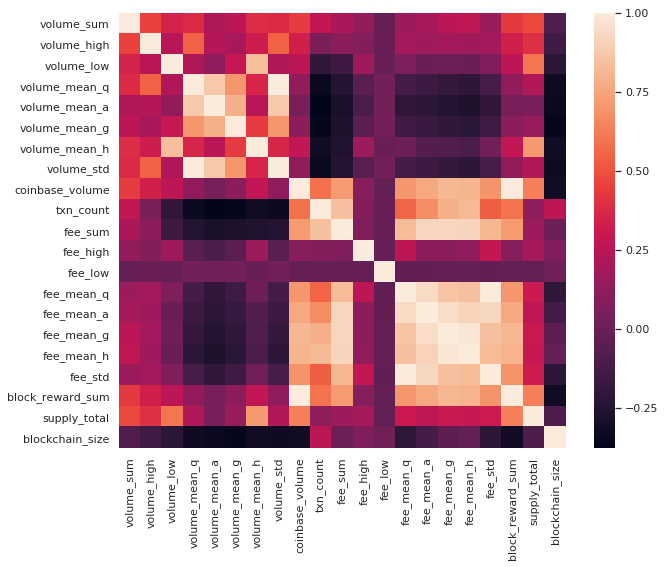

In [41]:
corr = bd.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()

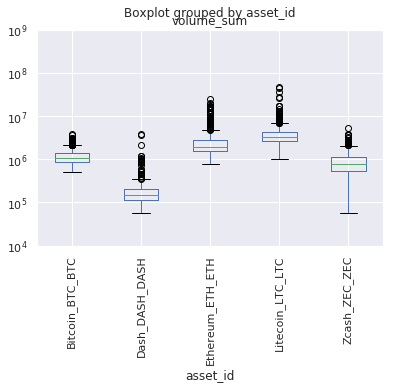

In [53]:
bd.boxplot('volume_sum', by='asset_id', rot=90)
plt.ylim(10**4, 10**9) # NOTE CAREFULLY THAT THE Y-AXIS ISN'T SCALED IN THE STANDARD WAY. 
plt.yscale('log')

In [42]:
# def find_high_correlated_features(frame):
#     new_corr = frame.corr()
#     new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
#     new_corr = new_corr.stack()
#     return new_corr[(new_corr > 0.1) | (new_corr < -0.1)]
     
    
# df_corr = find_high_correlated_features(bd)
# df_corr[:-1]


### Market Data

In [58]:
md = pd.read_csv('Tech_Eval/market_data.csv')
md.head(10) # Info on 10 coins, starts repeating after that. 

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
0,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-19 00:00:00+00,3932.7146,4093.5925,3841.5400,3947.8383,3982.9768,42.8431,3992.8516,3992.3314,505918,101619.9044,330.9573,0.0000,0.2457,1.3121
1,Cardano_ADA_ADA,USDollar_USD_USD,2019-02-19 00:00:00+00,0.0466,0.0518,0.0447,0.0469,0.0478,0.0007,0.0478,0.0478,89496,469704857.3000,1680672.2000,0.1000,6162.3629,18885.3467
2,Dash_DASH_DASH,USDollar_USD_USD,2019-02-19 00:00:00+00,87.6164,91.9520,85.8493,88.3894,88.4864,0.9261,88.4701,88.4600,23643,33410.3877,225.5077,0.0000,1.7380,5.3537
3,EOS_EOS_EOS,USDollar_USD_USD,2019-02-19 00:00:00+00,3.5506,4.0779,3.4017,3.5965,3.6773,0.0619,3.6787,3.6775,378772,48089265.9797,37712.5070,0.0000,187.9357,547.2507
4,Ethereum_ETH_ETH,USDollar_USD_USD,2019-02-19 00:00:00+00,148.7004,154.3054,141.9273,145.1237,148.8149,1.6507,149.0446,149.0233,578049,1743711.5660,2000.0000,0.0000,4.1723,15.8930
5,Litecoin_LTC_LTC,USDollar_USD_USD,2019-02-19 00:00:00+00,48.1928,61.5178,36.1693,48.0465,48.3667,0.6563,48.4078,48.3965,194864,1296146.0468,1792.2186,0.0000,8.9030,29.4625
6,NEO_NEO_NEO,USDollar_USD_USD,2019-02-19 00:00:00+00,8.9634,9.8676,8.5381,9.0614,9.1439,0.1320,9.1455,9.1434,82431,2435886.5689,5458.0660,0.0000,36.2456,92.0923
7,Ripple_XRP_XRP,USDollar_USD_USD,2019-02-19 00:00:00+00,0.3288,0.3727,0.3136,0.3288,0.3386,0.0069,0.3389,0.3388,432190,414183731.4814,338114.9000,0.0000,1068.0583,3257.4532
8,Stellar_XLM_XLM,USDollar_USD_USD,2019-02-19 00:00:00+00,0.0855,0.1006,0.0836,0.0915,0.0904,0.0029,0.0905,0.0904,160011,355766331.7339,1036663.7000,0.0000,2432.6346,8965.0819
9,TRON_TRX_TRX,USDollar_USD_USD,2019-02-19 00:00:00+00,0.0255,0.0280,0.0238,0.0253,0.0258,0.0003,0.0258,0.0258,95849,1114901929.8083,3145975.7000,0.0000,12400.1571,35206.6298


In [60]:
md.columns

Index(['base_asset_id', 'quote_asset_id', 'epoch_ts', 'price_open',
       'price_high', 'price_low', 'price_close', 'price_mean_a', 'price_std',
       'price_vwap_a', 'price_vwap_h', 'cnt_total', 'volume_total',
       'volume_high', 'volume_low', 'volume_mean_a', 'volume_std'],
      dtype='object')

In [54]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 17 columns):
base_asset_id     4563 non-null object
quote_asset_id    4563 non-null object
epoch_ts          4563 non-null object
price_open        4563 non-null float64
price_high        4563 non-null float64
price_low         4563 non-null float64
price_close       4563 non-null float64
price_mean_a      4563 non-null float64
price_std         4563 non-null float64
price_vwap_a      4563 non-null float64
price_vwap_h      4563 non-null float64
cnt_total         4563 non-null int64
volume_total      4563 non-null float64
volume_high       4563 non-null float64
volume_low        4563 non-null float64
volume_mean_a     4563 non-null float64
volume_std        4563 non-null float64
dtypes: float64(13), int64(1), object(3)
memory usage: 606.1+ KB


In [55]:
md.describe()

,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
count,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000,4563.0000
mean,734.6829,774.0017,434.9186,731.2661,731.2222,12.3490,731.1815,730.8449,187329.9853,226214987.8755,518648.4363,0.0337,1854.9632,5879.1618
std,2129.3203,2243.5496,1168.7424,2119.6409,2116.5330,46.9108,2116.0138,2114.9969,217537.3196,852420550.9863,1345516.8577,0.1675,4379.6574,13333.7026
min,0.0118,0.0122,0.0001,0.0117,0.0116,0.0001,0.0116,0.0116,1248.0000,5587.2138,25.2553,0.0000,0.1029,0.4338
25%,0.3174,0.3383,0.2899,0.3183,0.3169,0.0048,0.3165,0.3164,54874.5000,129572.9941,620.3056,0.0000,2.1894,8.0467
50%,26.4098,28.5770,14.5502,26.5267,26.7678,0.3960,26.7555,26.7516,110283.0000,1605367.7649,5234.2030,0.0000,14.9076,51.8389
75%,197.2516,211.1697,160.0479,195.5470,196.5882,3.3800,196.6958,196.5652,234194.5000,129306698.2281,402286.0000,0.0000,1377.0526,4422.6325
max,16781.3020,17252.0000,8958.8704,16743.2009,16347.6106,838.6807,16364.8153,16361.5350,2028791.0000,17256287853.0000,24469829.0000,1.0000,42554.8861,118982.6999


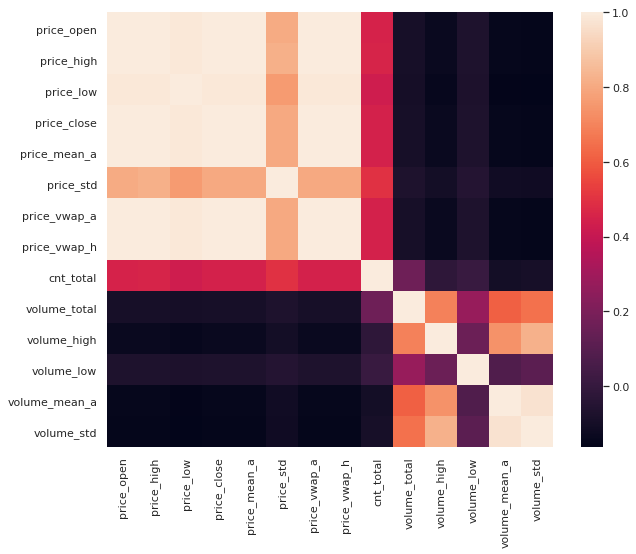

In [67]:
mcorr = md.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(mcorr)
plt.show()

# Wow 

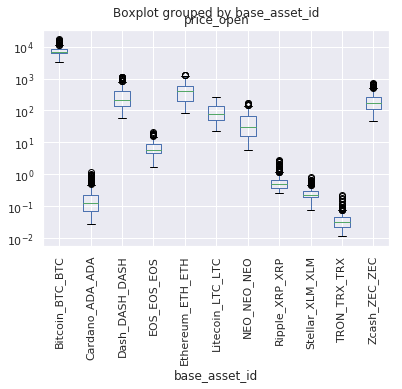

In [69]:
md.boxplot('price_open', by='base_asset_id', rot=90)
# plt.ylim(10**4, 10**9) # NOTE CAREFULLY THAT THE Y-AXIS ISN'T SCALED IN THE STANDARD WAY. 
plt.yscale('log')